In [154]:
# import necessary libraries 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
# read the data 

df= pd.read_csv(r'C:\Users\fabri\data_analyst_proyects\amazon_forest_fire\amazon.csv', encoding= "ISO-8859-1")

In [31]:
# view the data

df.shape

(6454, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [33]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [34]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [35]:
df.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2015-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


In [36]:
# dealing with missing values 

df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [45]:
# delete rows with 0 values that contributes none 

df.replace(0, np.nan, inplace = True)

In [54]:
df.dropna(inplace= True)

In [62]:
# columns datatypes and change types if needed

df['number']= df['number'].astype('int64')

In [59]:
df['date']= df['date'].astype('datetime64')

In [61]:
df.dtypes

year               int64
state             object
month             object
number             int64
date      datetime64[ns]
dtype: object

In [ ]:
# data exploration 

In [ ]:
# 1. Month with the most forest fire?

In [131]:
mfm = df.groupby('month')['number'].sum()
mfm = mfm.reset_index()
mfm = mfm.sort_values(by='number',ascending=False)
mfm

,month,number
5,Julho,92302
10,Outubro,88600
1,Agosto,87970
9,Novembro,85471
11,Setembro,58464
2,Dezembro,57513
6,Junho,56003
4,Janeiro,47746
7,Maio,34729
3,Fevereiro,30848


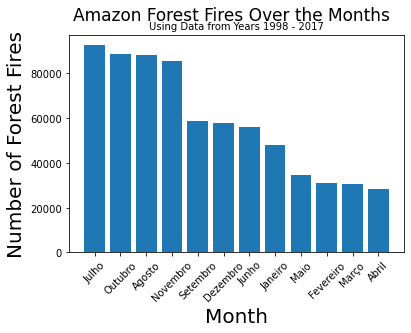

In [155]:
plt.bar(mfm['month'],mfm['number'])
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=17) 
plt.title('Using Data from Years 1998 - 2017', fontsize=10)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 2. what is the state with the most fires?

In [153]:
smf= df.groupby('state')['number'].sum()
smf= smf.reset_index()
smf= smf.sort_values(by='number',ascending=False)
smf

,state,number
10,Mato Grosso,96178
12,Paraiba,52432
20,Sao Paulo,51118
16,Rio,45160
4,Bahia,44718
15,Piau,37777
8,Goias,37677
11,Minas Gerais,37453
22,Tocantins,33675
3,Amazonas,30636


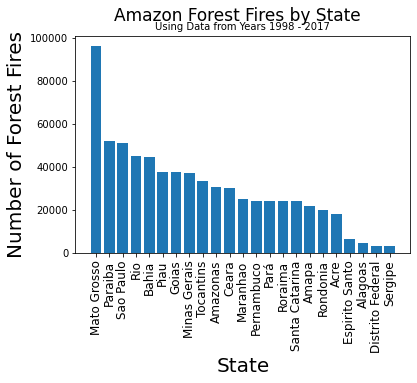

In [166]:
plt.bar(smf['state'],smf['number'])
plt.suptitle('Amazon Forest Fires by State', fontsize=17) 
plt.title('Using Data from Years 1998 - 2017', fontsize=10)  
plt.xlabel('State', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [169]:
# 3. what year has the most forest fires?

ymf= df.groupby('year')['number'].sum()
ymf= ymf.reset_index()
ymf= ymf.sort_values(by='number',ascending=False)
ymf

,year,number
5,2003,42737
18,2016,42189
17,2015,41184
14,2012,40065
16,2014,39601
11,2009,39104
6,2004,38427
4,2002,37369
12,2010,37015
19,2017,36663


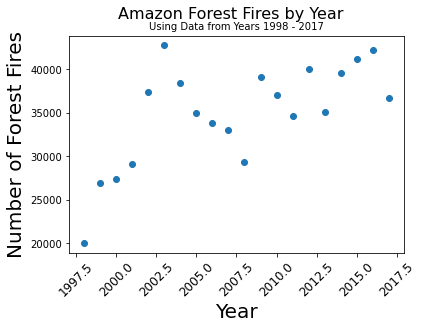

In [174]:
plt.scatter(ymf['year'],ymf['number'])
plt.suptitle('Amazon Forest Fires by Year', fontsize=16) 
plt.title('Using Data from Years 1998 - 2017', fontsize=10)  
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.show()